In [ ]:
# ==============================================================================
# Imports
# ==============================================================================

import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split

# ==============================================================================
# Data Load dataset
# ==============================================================================

!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

# ==============================================================================
# Data Preprocessing
# ==============================================================================

data = pd.read_csv('titanic.csv')
train_data, test_data = train_test_split(data, random_state=42)

preprocessing_train_data = copy.deepcopy(train_data)
preprocessing_test_data = copy.deepcopy(test_data)

# Add "SibSp" and "Parch" to make "FamilySize"
preprocessing_train_data['FamilySize'] = preprocessing_train_data['SibSp'] + preprocessing_train_data['Parch']
preprocessing_test_data['FamilySize'] = preprocessing_test_data['SibSp'] + preprocessing_test_data['Parch']

# Delete "SibSp" abd "Parch"
preprocessing_train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
preprocessing_test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# Divide "Family size" into 0 and 1 based on 4
preprocessing_train_data.loc[preprocessing_train_data['FamilySize'] <= 4, 'FamilySize'] = 0
preprocessing_train_data.loc[preprocessing_train_data['FamilySize'] > 4, 'FamilySize'] = 1

preprocessing_test_data.loc[preprocessing_test_data['FamilySize'] <= 4, 'FamilySize'] = 0
preprocessing_test_data.loc[preprocessing_test_data['FamilySize'] > 4, 'FamilySize'] = 1

# Extract "Name" and create "Title"
preprocessing_train_data['Title'] = preprocessing_train_data.Name.str.extract('([A-Za-z]+)\.', expand=False)
preprocessing_test_data['Title'] = preprocessing_test_data.Name.str.extract('([A-Za-z]+)\.', expand=False)

# Delete "Name", "Ticket", "Cabin" features
preprocessing_train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
preprocessing_test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# The rest except the main "Title" is classified as "Rare"
preprocessing_train_data['Title'].replace(['Lady', 'Countess', 'Capt','Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)
preprocessing_test_data['Title'].replace(['Lady', 'Countess', 'Capt','Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)

# Unify 'Ms', 'Mlle', 'Mme' as 'Miss'
preprocessing_train_data['Title'].replace(['Ms', 'Mlle', 'Mme'], 'Miss', inplace=True)
preprocessing_test_data['Title'].replace(['Ms', 'Mlle', 'Mme'], ['Miss', 'Miss', 'Miss'], inplace=True)

# "Title" vectorization
preprocessing_train_data['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], [1, 2, 3, 4, 5], inplace=True)
preprocessing_test_data['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], [1, 2, 3, 4, 5], inplace=True)

# Set '0' for unknown "Title"
preprocessing_train_data['Title'].replace([None], [0], inplace=True)
preprocessing_test_data['Title'].replace([None], [0], inplace=True)

# Fill unknown "Embarked" to 'S'
preprocessing_train_data['Embarked'].replace([None], ['S'], inplace=True)
preprocessing_test_data['Embarked'].replace([None], ['S'], inplace=True)

# "Embarked", "Sex" vectorization
preprocessing_train_data.replace(['female', 'male'], [0, 1], inplace=True)
preprocessing_train_data.replace(['Q', 'C', 'S'], [0, 1, 2], inplace=True)

preprocessing_test_data.replace(['female', 'male'], [0, 1], inplace=True)
preprocessing_test_data.replace(['Q', 'C', 'S'], [0, 1, 2], inplace=True)

age_median = preprocessing_train_data["Age"].median()
preprocessing_train_data["Age"] = preprocessing_train_data["Age"].fillna(age_median)

preprocessing_test_data["Age"] = preprocessing_test_data["Age"].fillna(age_median)

--2024-04-03 11:00:19--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv.7’

titanic.csv.7       100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2024-04-03 11:00:19 (5.12 MB/s) - ‘titanic.csv.7’ saved [60302/60302]



In [ ]:
# =============================================================================
# Assignment One
# =============================================================================

new_train = copy.deepcopy(preprocessing_train_data)
new_test = copy.deepcopy(preprocessing_test_data)

new_train['FamilySize'] = train_data['SibSp'] + train_data['Parch']
new_test['FamilySize'] = test_data['SibSp'] + test_data['Parch']

new_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
298,299,1,1,1,28.00,30.5000,2,0,1
884,885,0,3,1,25.00,7.0500,2,0,1
247,248,1,2,0,24.00,14.5000,2,2,3
478,479,0,3,1,22.00,7.5208,2,0,1
305,306,1,1,1,0.92,151.5500,2,3,4
316,317,1,2,0,24.00,26.0000,2,1,3
2,3,1,3,0,26.00,7.9250,2,0,2
405,406,0,2,1,34.00,21.0000,2,1,1
742,743,1,1,0,21.00,262.3750,1,4,2
260,261,0,3,1,28.00,7.7500,0,0,1


In [ ]:
# =============================================================================
# Assignment Two
# =============================================================================

age_mean = new_train["Age"].mean()
age_std = np.std(new_train["Age"])

new_train["Age"] = (new_train["Age"]-age_mean)/age_std
new_test["Age"] = (new_test["Age"]-age_mean)/age_std

new_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
298,299,1,1,1,-0.087648,30.5000,2,0,1
884,885,0,3,1,-0.318203,7.0500,2,0,1
247,248,1,2,0,-0.395055,14.5000,2,2,3
478,479,0,3,1,-0.548758,7.5208,2,0,1
305,306,1,1,1,-2.168793,151.5500,2,3,4
316,317,1,2,0,-0.395055,26.0000,2,1,3
2,3,1,3,0,-0.241351,7.9250,2,0,2
405,406,0,2,1,0.373463,21.0000,2,1,1
742,743,1,1,0,-0.625610,262.3750,1,4,2
260,261,0,3,1,-0.087648,7.7500,0,0,1


In [ ]:
# =============================================================================
# Assignment Three
# =============================================================================

fare_mean = new_train["Fare"].mean()
fare_std = np.std(new_train["Fare"])

new_train["Fare"] = (new_train["Fare"]-fare_mean)/fare_std
new_test["Fare"] = (new_test["Fare"]-fare_mean)/fare_std

new_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
298,299,1,1,1,-0.087648,-0.032568,2,0,1
884,885,0,3,1,-0.318203,-0.487331,2,0,1
247,248,1,2,0,-0.395055,-0.342854,2,2,3
478,479,0,3,1,-0.548758,-0.478201,2,0,1
305,306,1,1,1,-2.168793,2.314937,2,3,4
316,317,1,2,0,-0.395055,-0.119836,2,1,3
2,3,1,3,0,-0.241351,-0.470362,2,0,2
405,406,0,2,1,0.373463,-0.216800,2,1,1
742,743,1,1,0,-0.625610,4.464151,1,4,2
260,261,0,3,1,-0.087648,-0.473756,0,0,1


Accuracy:  78.03
Area Under the Curve:  0.88


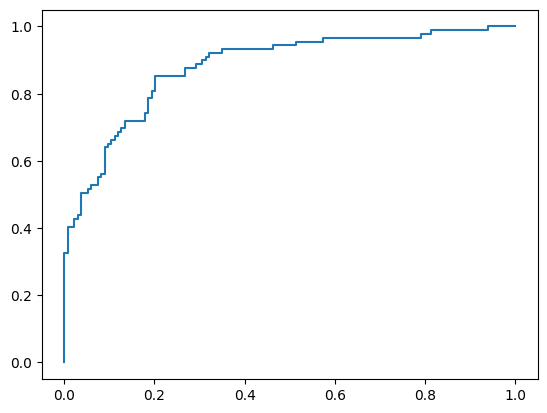

In [ ]:
# =============================================================================
# Assignment Four
# =============================================================================

X_train = new_train.drop(['Survived', 'PassengerId'], axis=1)
Y_train = new_train["Survived"]
X_test = new_test.drop(['Survived', 'PassengerId'], axis=1)
Y_test = new_test['Survived']

classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

accuracy = classifier.score(X_test, Y_test) * 100
Y_test_pred = classifier.predict_proba(X_test)[:, 1]

FPR, TPR, thresholds = roc_curve(Y_test, Y_test_pred)
AUC = roc_auc_score(Y_test, Y_test_pred)

plt.plot(FPR, TPR)
print("Accuracy: ", "{0:.2f}".format(accuracy))
print("Area Under the Curve: ", "{0:.2f}".format(AUC))